# 作業
- 作業目標 : 用 iris (dataset.load_iris()) 資料嘗試跑 hierarchical clustering

In [1]:
from sklearn import datasets

iris = datasets.load_iris()
X = iris.data
y = iris.target



載入 相關套件 並 執行 hierarchical clustering 實驗 ...

AgglomerativeClustering(\
    n_clusters=2,\
    affinity='euclidean',\
    memory=None,\
    connectivity=None,\
    compute_full_tree='auto',\
    linkage='ward',\
    pooling_func='deprecated',\
    distance_threshold=None,\
)

In [27]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
# Though the following import is not directly being used, it is required
# for 3D projection to work
from mpl_toolkits.mplot3d import Axes3D

from sklearn.cluster import AgglomerativeClustering

In [28]:
def get3Dplot(axis1,axis2,axis3,labels,Title=''):
    fig = plt.figure(2, figsize=(5, 4))
    ax = Axes3D(fig, rect=[0, 0, 1, 1], elev=48, azim=134)
    ax.scatter(axis1,axis2,axis3,
               c=labels, edgecolor='k')
    ax.w_xaxis.set_ticklabels([])
    ax.w_yaxis.set_ticklabels([])
    ax.w_zaxis.set_ticklabels([])
    ax.set_title(Title)
    plt.show()
#調整顏色
def relabelToy(lb,y):
    maplist=[
        {0:1,1:2,2:0},#全錯
        {0:2,1:0,2:1},
        {0:0,1:2,2:1},#0對
        {0:2,1:1,2:0},#1對
        {0:1,1:0,2:2},#2對
    ]
    score = (lb==y).sum()
    result = lb
    for mp in maplist:
        temp = np.array(pd.Series(lb).map(mp))
        temp_score = (temp==y).sum()
        #分數越高代表相似度越高！
        if temp_score>score:
            result = temp
            score = temp_score
    return result
    

In [29]:
ax1,ax2,ax3,ax4 = [X[:,i] for i in range(len(X[0]))]


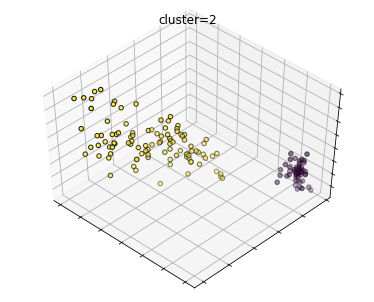

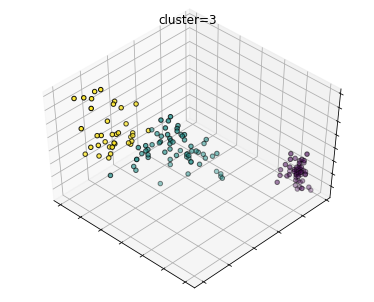

In [34]:
#n_cluster test
est = AgglomerativeClustering(n_clusters=2)
est.fit(X)
lb = relabelToy(est.labels_,y)
get3Dplot(ax3,ax4,ax1,labels=lb,Title='cluster=2')
est = AgglomerativeClustering(n_clusters=3)
est.fit(X)
lb = relabelToy(est.labels_,y)
get3Dplot(ax3,ax4,ax1,labels=lb,Title='cluster=3')

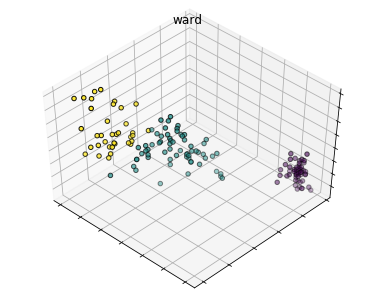

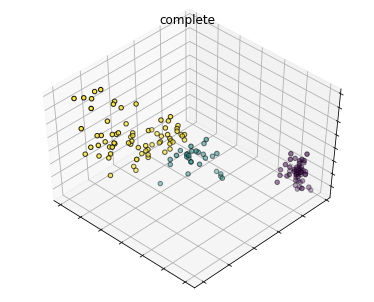

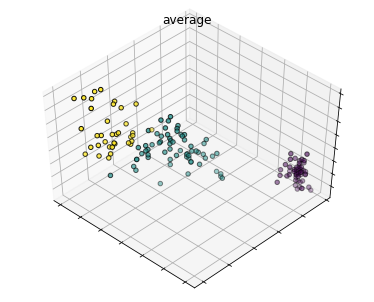

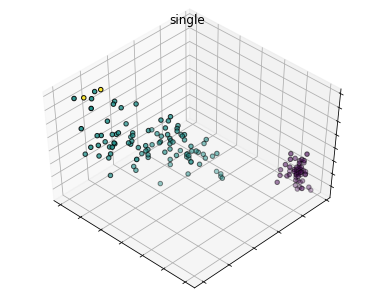

In [36]:
#linkage test
titles = ['ward', 'complete', 'average', 'single']
for ti in titles:
    est = AgglomerativeClustering(n_clusters=3,linkage=ti)
    est.fit(X)
    lb = relabelToy(est.labels_,y)
    get3Dplot(ax3,ax4,ax1,labels=lb,Title=ti)